In [63]:
# Establishing connection to SQLite
import sqlite3
connection = sqlite3.connect('student_grades.db')
print("Database created and connected!")


Database created and connected!


In [64]:
# Creating cursor
cursor = connection.cursor()
print("Cursor created!")

Cursor created!


In [65]:
# drop the students table
cursor.execute('''
DROP TABLE IF EXISTS students
''')

print("Students table dropped!")

# creating students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
  student_id INTEGER PRIMARY KEY AUTOINCREMENT,
  first_name TEXT NOT NULL,
  last_name TEXT NOT NULL
)
''')

print("Students table created!")

Students table dropped!
Students table created!


In [66]:
# creating grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
  grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
  student_id INTEGER,
  subject TEXT NOT NULL,
  grade INTEGER,
  FOREIGN KEY (student_id) REFERENCES student(student_id)
)
''')

print("Grades table created!")

Grades table created!


In [67]:
# Sample data
students_data = [
    (1, "Alice", "Johnson"),
    (2, "Bob", "Smith"),
    (3, "Carol", "White"),
    (4, "David", "Brown"),
    (5, "Eve", "Davis")
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [70]:
# Sample data
grades_data = [
    (1, "Math", 95),
    (1, "English", 88),
    (1, "History", 90),
    (2, "Math", 82),
    (2, "English", 76),
    (2, "History", 85),
    (3, "Math", 87),
    (3, "English", 92),
    (3, "History", 79),
    (4, "Math", 91),
    (4, "English", 89),
    (4, "History", 93),
    (5, "Math", 84),
    (5, "English", 90),
    (5, "History", 86)
]

#Insert data
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [71]:
# Query to retrieve all students' names and their grades
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
from students
join grades on students.student_id = grades.student_id;
''')

results = cursor.fetchall()

for row in results:
  print(f"Student: {row[0]} {row[1]}, Subject: {row[2]}, Grade: {row[3]}")

Student: Alice Johnson, Subject: Math, Grade: 95
Student: Alice Johnson, Subject: English, Grade: 88
Student: Alice Johnson, Subject: History, Grade: 90
Student: Bob Smith, Subject: Math, Grade: 82
Student: Bob Smith, Subject: English, Grade: 76
Student: Bob Smith, Subject: History, Grade: 85
Student: Carol White, Subject: Math, Grade: 87
Student: Carol White, Subject: English, Grade: 92
Student: Carol White, Subject: History, Grade: 79
Student: David Brown, Subject: Math, Grade: 91
Student: David Brown, Subject: English, Grade: 89
Student: David Brown, Subject: History, Grade: 93
Student: Eve Davis, Subject: Math, Grade: 84
Student: Eve Davis, Subject: English, Grade: 90
Student: Eve Davis, Subject: History, Grade: 86
Student: Alice Johnson, Subject: Math, Grade: 95
Student: Alice Johnson, Subject: English, Grade: 88
Student: Alice Johnson, Subject: History, Grade: 90
Student: Bob Smith, Subject: Math, Grade: 82
Student: Bob Smith, Subject: English, Grade: 76
Student: Bob Smith, Subje

In [72]:
# Finding average grade for each student
cursor.execute('''
select students.first_name, students.last_name, AVG(grades.grade)
from students
join grades on students.student_id = grades.student_id
group by students.student_id;
''')

avg_results = cursor.fetchall()

for row in avg_results:
  print(f"Student: {row[0]} {row[1]}, Average Grade: {row[2]}")

Student: Alice Johnson, Average Grade: 91.0
Student: Bob Smith, Average Grade: 81.0
Student: Carol White, Average Grade: 86.0
Student: David Brown, Average Grade: 91.0
Student: Eve Davis, Average Grade: 86.66666666666667


In [73]:
# Finding student with the highest average grade
cursor.execute('''
select students.first_name, students.last_name, AVG(grades.grade)
from students
join grades on students.student_id = grades.student_id
group by students.student_id
order by avg(grades.grade) DESC
LIMIT 1;
''')

highest_avg = cursor.fetchone()

print(f"Student with the highest average grade: {highest_avg[0]} {highest_avg[1]}")

Student with the highest average grade: David Brown


In [74]:
# Finding average grade for the Math subject
cursor.execute('''
select grades.subject, avg(grades.grade)
from students
join grades on students.student_id = grades.student_id
group by grades.subject
order by avg(grades.grade) DESC
limit 1;
''')

math_avg = cursor.fetchone()

print(f"Average grade for the Math subject: {math_avg[0]} {math_avg[1]}")

Average grade for the Math subject: Math 87.8


In [75]:
# Listing all students who scored above 90 in any subject
cursor.execute('''
select students.first_name, students.last_name, grades.subject, grades.grade
from students
join grades on students.student_id = grades.student_id
where grades.grade >90;
''')

above_90 = cursor.fetchall()

for row in above_90:
  print(f"Student: {row[0]} {row[1]}, Subject: {row[2]}, Grade: {row[3]}")

Student: Alice Johnson, Subject: Math, Grade: 95
Student: Carol White, Subject: English, Grade: 92
Student: David Brown, Subject: Math, Grade: 91
Student: David Brown, Subject: History, Grade: 93
Student: Alice Johnson, Subject: Math, Grade: 95
Student: Carol White, Subject: English, Grade: 92
Student: David Brown, Subject: Math, Grade: 91
Student: David Brown, Subject: History, Grade: 93


In [76]:
# JOIN query between students and grades
conn= sqlite3.connect('students_grades.db')

join_query = cursor.execute('''
select students.first_name, students.last_name, grades.subject, grades.grade
from students
join grades on students.student_id = grades.student_id;
''')

joined_data = cursor.fetchall()

print("Joined students and grades:")
for row in joined_data:
    print(row)

Joined students and grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 87)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 79)
('David', 'Brown', 'Math', 91)
('David', 'Brown', 'English', 89)
('David', 'Brown', 'History', 93)
('Eve', 'Davis', 'Math', 84)
('Eve', 'Davis', 'English', 90)
('Eve', 'Davis', 'History', 86)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 87)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 79)
('David', 'Brown', 'Math', 91)
('David', 'Brown', 'English', 89)
('David', 'Brown', 'History', 93)
('Eve', 'Davis', 'Math', 84)
('Eve', 'Davis', 'English', 90)
('Eve', 'Davis', 'History'

In [91]:
# using Pandas to load data from tables into DataFrames
import pandas as pd

connection = sqlite3.connect('student_grades.db')
students_df = pd.read_sql_query('SELECT * FROM students', connection)
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

print("Students DataFrame:")
print(students_df)

print("Grades DataFrame:")
print(grades_df)

conn.close()

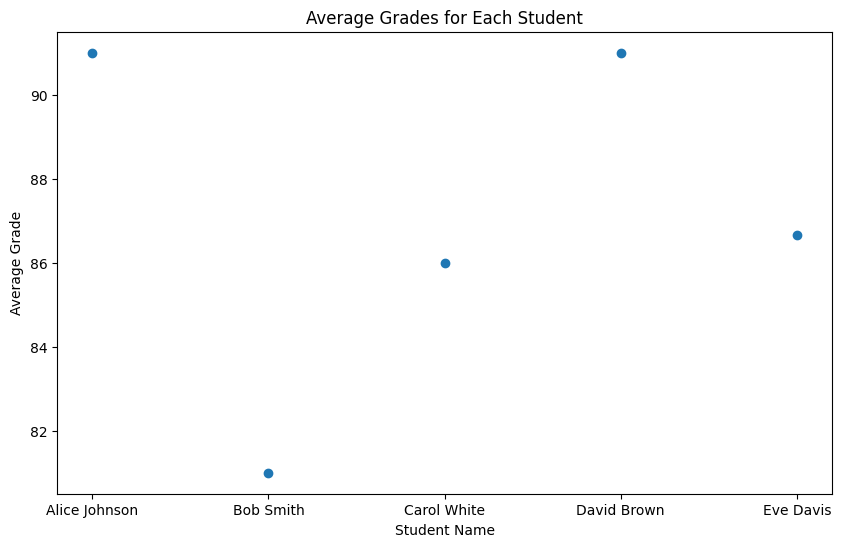

In [92]:
# plot average grades for each student

average_grades_df = grades_df.groupby('student_id')['grade'].mean().reset_index()
average_grades_df.columns = ['student_id', 'average_grade']

average_grades_df = pd.merge(average_grades_df, students_df, on='student_id')

average_grades_df['full_name'] = average_grades_df['first_name'] + ' ' + average_grades_df['last_name']

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.scatter(average_grades_df['full_name'], average_grades_df['average_grade'])

plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')

plt.show()

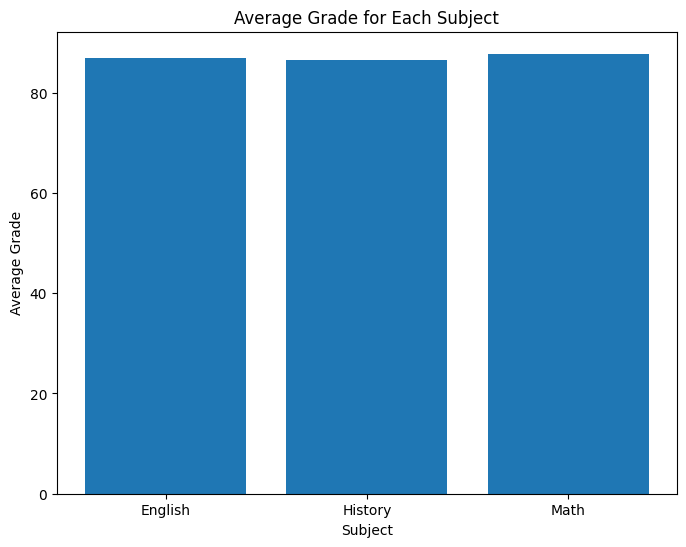

In [93]:
# Creating a bar chart showing the average grade for each subject
average_grades_subject = grades_df.groupby('subject')['grade'].mean().reset_index()

plt.figure(figsize = (8, 6))
plt.bar(average_grades_subject['subject'], average_grades_subject['grade'])

plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')

plt.show()
